# Diabetes Prediction Using Machine Learning

## Project Statement
Diabetes is a chronic disease that requires continuous medical care to prevent complications. Hospital readmissions of diabetic patients place a significant burden on healthcare systems, increasing costs and patient risks. This project aims to predict diabetes-related hospital readmission using the Diabetes 130-US Hospitals dataset. By applying machine learning algorithms, we will identify key factors influencing readmission rates and develop a predictive model to assist healthcare providers in proactive decision-making.

## Problem Statement
Diabetes is a chronic disease affecting millions of people worldwide, leading to serious complications if not managed properly. One of the critical challenges in diabetes care is the high rate of hospital readmissions, which puts financial strain on healthcare systems and increases the risk of complications for patients.
The Diabetes 130-US Hospitals dataset contains medical records of diabetic patients from 130 hospitals, providing valuable insights into factors influencing hospital readmissions. However, identifying which patients are at risk of early readmission (<30 days) is a complex task due to the large number of variables involved, including demographics, lab test results, medication history, and prior hospital visits.
This project aims to build a machine learning model that can predict hospital readmission for diabetic patients based on their medical history and treatment patterns. By leveraging data preprocessing, feature selection, and various classification algorithms, we aim to improve hospital decision-making, reduce readmission rates, and enhance patient care.



### Import Required Libraries

In [1]:
# Import necessary libraries
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")
    
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore, skew
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.feature_selection import SelectKBest, f_classif

# Scikit-learn libraries for model training and evaluation
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB


### Load and Explore Data

In [2]:
# Load dataset (modify path as needed)
df = pd.read_csv("diabetic_data.csv")  

# Display dataset information
print("Dataset Overview:")
print(df.info())

# Display first few rows
print("First 5 Rows of Dataset:")
df.head()

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


### Exploratory Data Analysis (EDA)
#### Univariate Analysis - Feature Distributions

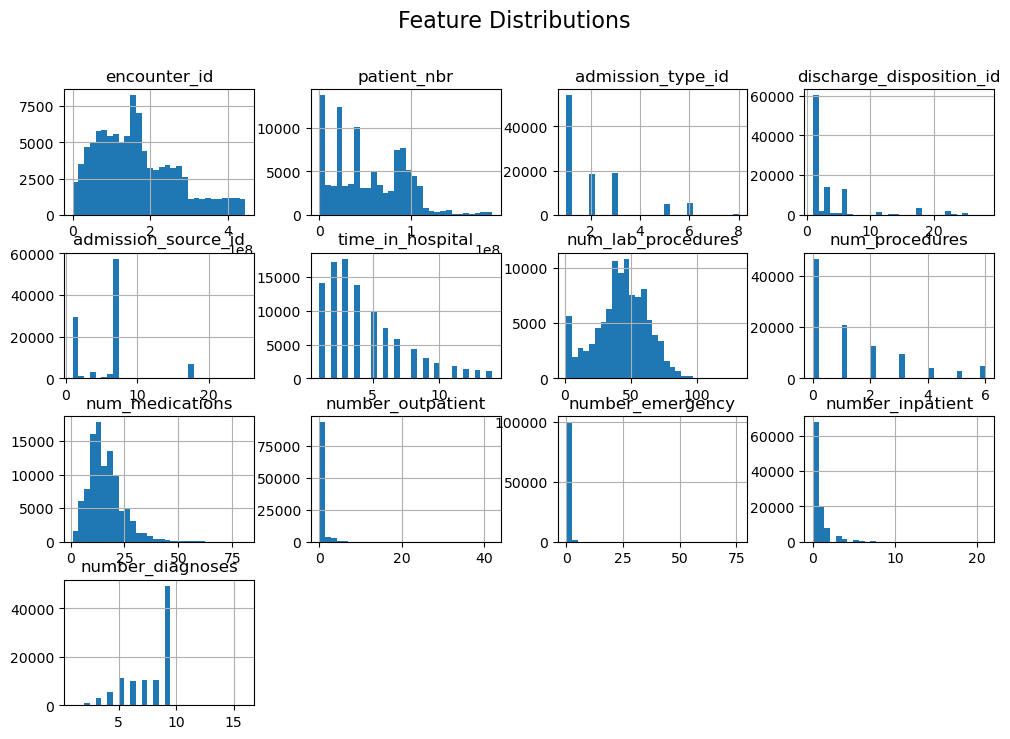

In [3]:
# Plot histogram for numerical features
df.hist(figsize=(12, 8), bins=30)
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()

#### Skewness Detection & Handling

In [4]:
# Check skewness of numerical features
skew_values = df.skew(numeric_only=True)
print("Skewness of Features:\n", skew_values)

# Identify highly skewed features (threshold = ±0.5)
skewed_features = skew_values[abs(skew_values) > 0.5].index

# Apply log transformation to reduce skewness
df[skewed_features] = np.log1p(df[skewed_features])

print("Skewness handled using log transformation.")

Skewness of Features:
 encounter_id                 0.699142
patient_nbr                  0.471281
admission_type_id            1.591984
discharge_disposition_id     2.563067
admission_source_id          1.029935
time_in_hospital             1.133999
num_lab_procedures          -0.236544
num_procedures               1.316415
num_medications              1.326672
number_outpatient            8.832959
number_emergency            22.855582
number_inpatient             3.614139
number_diagnoses            -0.876746
dtype: float64
Skewness handled using log transformation.


##### Convert Categorical Features to Numeric Before Correlation Analysis

In [5]:
# Convert categorical variables to numeric using Label Encoding
cat_columns = df.select_dtypes(include=['object']).columns
encoder = LabelEncoder()
for col in cat_columns:
    df[col] = encoder.fit_transform(df[col])

print("Categorical features encoded successfully.")

Categorical features encoded successfully.


#### Bivariate Analysis - Correlation Between Features

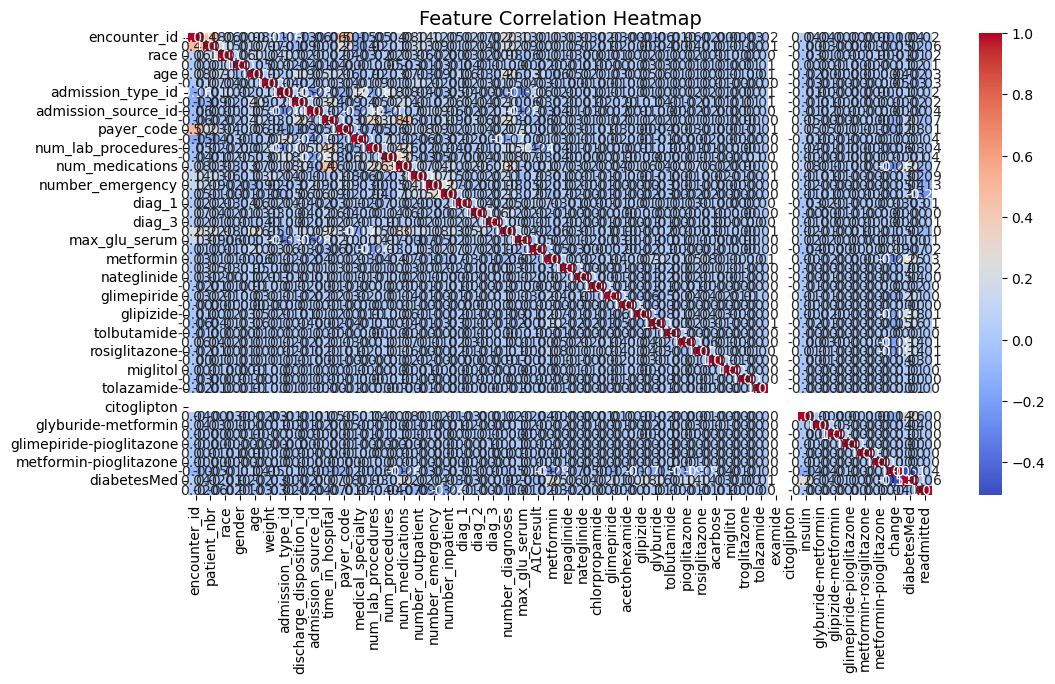

In [6]:
# Correlation heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap", fontsize=14)
plt.show()

#### Outlier Detection Using Boxplots

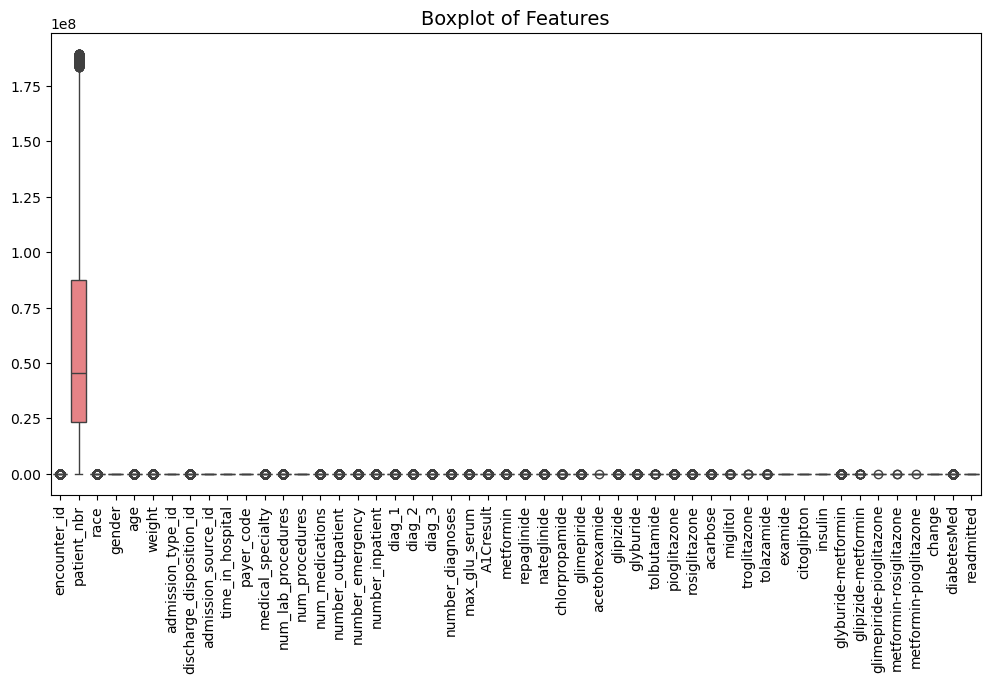

In [7]:
# Boxplots to visualize outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.title("Boxplot of Features", fontsize=14)
plt.show()

#### Boxplots for Features Distribution by Readmission Status

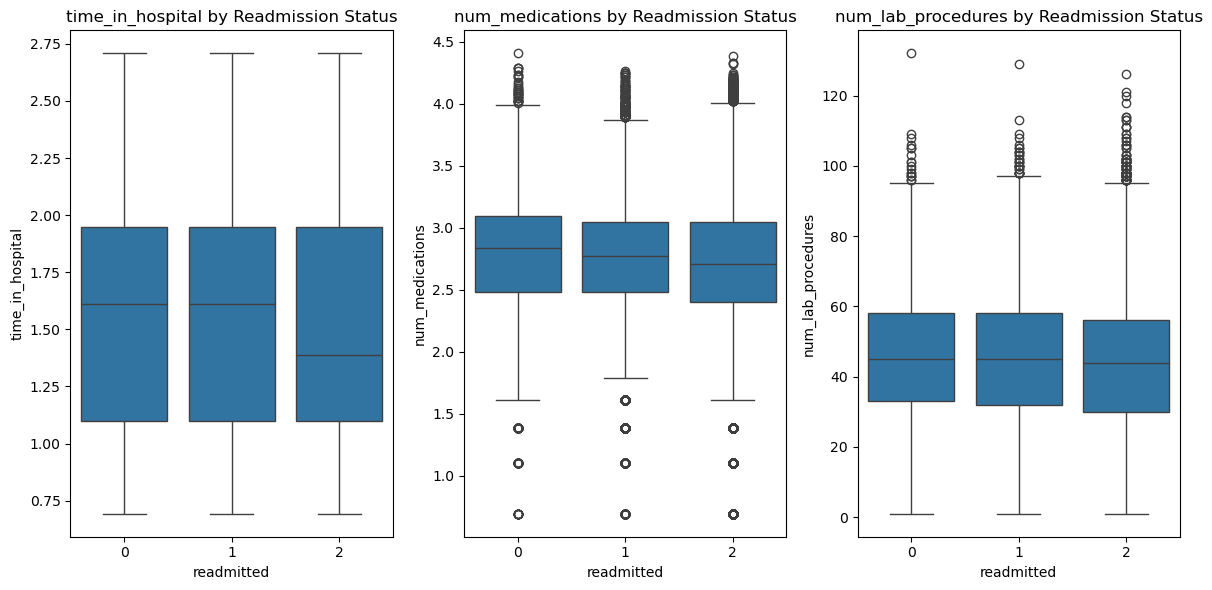

In [8]:
# Select important numerical features
selected_features = ["time_in_hospital", "num_medications", "num_lab_procedures"]

# Create boxplots
plt.figure(figsize=(12, 6))
for i, feature in enumerate(selected_features, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(x=df["readmitted"], y=df[feature])
    plt.title(f"{feature} by Readmission Status")

plt.tight_layout()
plt.show()

### Handling MIssing Values

In [9]:
# Check missing values
print("Missing values:\n", df.isnull().sum())

# Impute missing values with the median
imputer = SimpleImputer(strategy="median")
df.iloc[:, :] = imputer.fit_transform(df)

print("Missing values handled using median imputation.")

Missing values:
 encounter_id                0
patient_nbr                 0
race                        0
gender                      0
age                         0
weight                      0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
payer_code                  0
medical_specialty           0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
max_glu_serum               0
A1Cresult                   0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide            

### Outlier Detection & Removal
#### IQR Method for Outlier Removal

In [10]:
# Compute IQR
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Define outlier thresholds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df = df[~((df < lower_bound) | (df > upper_bound)).any(axis=1)]
print("Data shape after IQR-based outlier removal:", df.shape)

Data shape after IQR-based outlier removal: (8883, 50)


### Encoding Categorical Variables

In [11]:
# Identify categorical columns
cat_columns = df.select_dtypes(include=['object']).columns

# Convert categorical values to numerical using Label Encoding
encoder = LabelEncoder()
for col in cat_columns:
    df[col] = encoder.fit_transform(df[col])

print("Categorical features encoded successfully.")

Categorical features encoded successfully.


### Feature Scaling & Normalization


In [12]:
from sklearn.preprocessing import StandardScaler

# Apply Standardization (Z-score scaling)
scaler = StandardScaler()
df_scaled = df.copy()
df_scaled[df_scaled.columns] = scaler.fit_transform(df_scaled)

print("Standardization applied successfully.")

Standardization applied successfully.


### Feature Selection 
#### SelectKBest - Choosing Top 10 Features

In [13]:
# Separate features and target variable
X = df.drop(columns=["readmitted"])  # Assuming 'readmitted' is the target variable
y = df["readmitted"]

# Apply SelectKBest to select top 10 features
selector = SelectKBest(score_func=f_classif, k=10)
X_selected = selector.fit_transform(X, y)

# Get selected feature names
selected_features = X.columns[selector.get_support()]
print("Top 10 Selected Features:", selected_features)

Top 10 Selected Features: Index(['encounter_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'medical_specialty', 'num_procedures',
       'num_medications', 'number_inpatient', 'number_diagnoses', 'change'],
      dtype='object')


In [14]:
df.to_csv("cleaned_diabetes_data.csv", index=False)
print("Cleaned data saved successfully.")

Cleaned data saved successfully.


In [15]:
# Load preprocessed dataset
df = pd.read_csv("cleaned_diabetes_data.csv")

# Display the first few rows
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,16.765191,23152230,3,1,7,1,0.693147,1.945910,2.079442,1.098612,...,0,2,1,0,0,0,0,1,1,2
1,16.770087,5501304,3,0,6,1,1.098612,0.693147,0.693147,1.098612,...,0,0,1,0,0,0,0,0,1,1
2,16.770394,4668894,3,1,6,1,0.693147,0.693147,2.079442,1.098612,...,0,2,1,0,0,0,0,1,1,2
3,16.773214,104972877,3,1,7,1,1.386294,0.693147,1.098612,1.098612,...,0,0,1,0,0,0,0,0,1,2
4,16.780028,633906,3,0,9,1,0.693147,0.693147,2.079442,0.693147,...,0,2,1,0,0,0,0,1,1,0


### Splitting the Data

In [16]:
# Split features and target variable
X = df.drop(columns=['readmitted'])  # Adjust 'target' based on your dataset
y = df['readmitted']

# Split into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Display the shape of training and testing sets
print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")

Training set shape: (7106, 49)
Testing set shape: (1777, 49)


### Model Selection & Training

In [17]:
# Train Logistic Regression
print("Training Logistic Regression...")
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
print("Logistic Regression Done!")


Training Logistic Regression...
Logistic Regression Done!


In [18]:
# Train Random Forest
print("Training Random Forest...")
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
print("Random Forest Done!")


Training Random Forest...
Random Forest Done!


In [19]:

# Train SVM
print("Training SVM...")
svm = SVC()
svm.fit(X_train, y_train)
print("SVM Done!")

Training SVM...
SVM Done!


### Model Performance Comparison

##### Store model accuracy in results

In [20]:
from sklearn.metrics import accuracy_score

def evaluate_model(model, X_train, y_train, X_test, y_test, name):
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy  # Store accuracy in results dictionary
    
    # Print accuracy
    print(f"{name} Accuracy: {accuracy:.4f}")

# Initialize results dictionary
results = {}

# Train models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

evaluate_model(LogisticRegression(), X_train, y_train, X_test, y_test, "Logistic Regression")
evaluate_model(RandomForestClassifier(), X_train, y_train, X_test, y_test, "Random Forest")
evaluate_model(SVC(), X_train, y_train, X_test, y_test, "SVM")

# Print results to check
print("Results:", results)

Training Logistic Regression...
Logistic Regression Accuracy: 0.5408
Training Random Forest...
Random Forest Accuracy: 0.5594
Training SVM...
SVM Accuracy: 0.5408
Results: {'Logistic Regression': 0.5407990996060776, 'Random Forest': 0.5593697242543613, 'SVM': 0.5407990996060776}


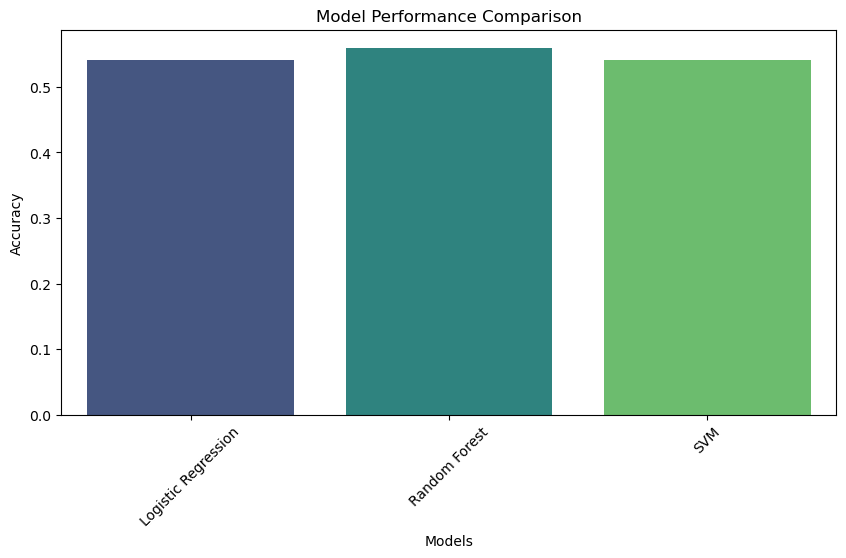

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert results to lists
models = list(results.keys())
accuracies = list(results.values())

# Plot the bar chart
plt.figure(figsize=(10, 5))
sns.barplot(x=models, y=accuracies, palette="viridis")

# Formatting
plt.xticks(rotation=45)
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Model Performance Comparison")
plt.show()

### Hyperparameter Tuning (Random Forest Example)

In [22]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Initialize the model
rf = RandomForestClassifier()

# Apply GridSearchCV
print("Starting GridSearchCV for Random Forest...")  # ✅ Track Progress
grid_search = GridSearchCV(rf, param_grid, cv=5, n_jobs=-1, verbose=2)  # ✅ Add verbose=2

# Fit the model
grid_search.fit(X_train, y_train)

# Print best parameters and accuracy
print("\n✅ Best Parameters:", grid_search.best_params_)
print("\n✅ Best Accuracy:", grid_search.best_score_)

Starting GridSearchCV for Random Forest...
Fitting 5 folds for each of 27 candidates, totalling 135 fits

✅ Best Parameters: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 200}

✅ Best Accuracy: 0.5840138528858363


### Best Model Performance Analysis

In [24]:
from sklearn.metrics import confusion_matrix, classification_report

# ✅ Get the best model from GridSearchCV
best_model = grid_search.best_estimator_  # Use the best model from tuning

# ✅ Make predictions using the best model
y_pred_best = best_model.predict(X_test)  

# ✅ Generate Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_best)

# ✅ Display Confusion Matrix
print("Confusion Matrix:\n", conf_matrix)

# ✅ Display Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred_best))

Confusion Matrix:
 [[  0  70 141]
 [  1 191 413]
 [  0 135 826]]

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       211
           1       0.48      0.32      0.38       605
           2       0.60      0.86      0.71       961

    accuracy                           0.57      1777
   macro avg       0.36      0.39      0.36      1777
weighted avg       0.49      0.57      0.51      1777



##### Confusion Matrix

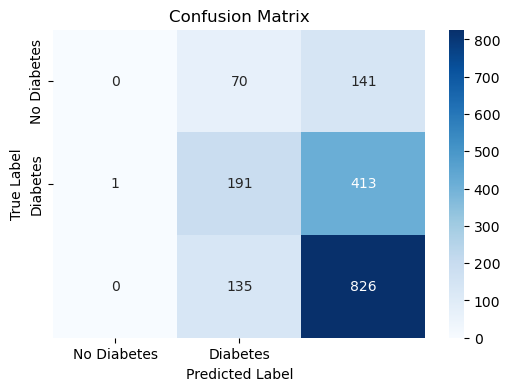

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["No Diabetes", "Diabetes"], yticklabels=["No Diabetes", "Diabetes"])

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

##### ROC Curve

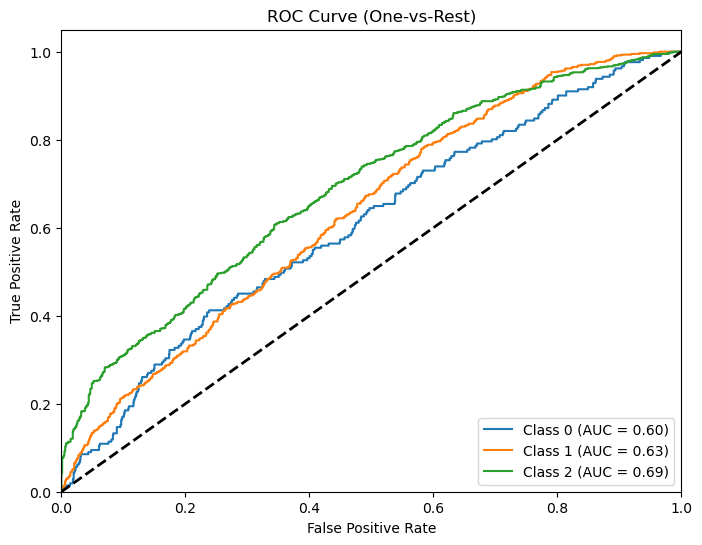

In [27]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# ✅ Convert target variable to binary format (One-vs-Rest)
y_test_bin = label_binarize(y_test, classes=best_model.classes_)  # Ensure correct class order

# ✅ Get model probabilities
y_score = best_model.predict_proba(X_test)

# ✅ Plot ROC Curve for each class
plt.figure(figsize=(8, 6))
for i in range(y_test_bin.shape[1]):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"Class {best_model.classes_[i]} (AUC = {roc_auc:.2f})")

# ✅ Final plot settings
plt.plot([0, 1], [0, 1], 'k--', lw=2)  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (One-vs-Rest)")
plt.legend(loc="lower right")
plt.show()